In [1]:
# Simple RNN using numpy

import numpy as np

timesteps = 100
input_features= 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs:
    
    output_t = np.tanh(np.dot(W, input_t) +  np.dot(U, state_t ) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

C:\Users\yueki\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.5945 - acc: 0.6791 - val_loss: 0.4574 - val_acc: 0.7920
Epoch 2/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.3653 - acc: 0.8483 - val_loss: 0.4520 - val_acc: 0.7876
Epoch 3/10
20000/20000 [==============================] - 33s 2ms/step - loss

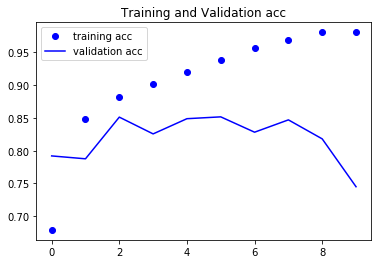

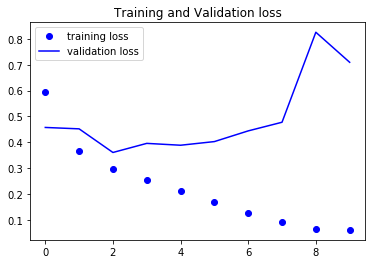

In [6]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10, batch_size=128, validation_split=0.2)

from _compareTV import compare_TV
compare_TV(history)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.5363 - acc: 0.7487 - val_loss: 0.5963 - val_acc: 0.7038
Epoch 2/10
20000/20000 [==============================] - 107s 5ms/step - loss: 0.3017 - acc: 0.8823 - val_loss: 0.3365 - val_acc: 0.8592
Epoch 3/10
20000/20000 [==============================] - 107s 5ms/step - loss: 0.2361 - acc: 0.9127 - val_loss: 0.3045 - val_acc: 0.8760
Epoch 4/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.1981 - acc: 0.9277 - val_loss: 0.3258 - val_acc: 0.8714
Epoch 5/10
20000/20000 [==============================] - 107s 5ms/step - loss: 0.1788 - acc: 0.9344 - val_loss: 0.3022 - val_acc: 0.8722
Epoch 6/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.1600 - acc: 0.9429 - val_loss: 0.4712 - val_acc: 0.8228
Epoch 7/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.1497 - acc: 0.9484 - val_loss: 0.3246 - v

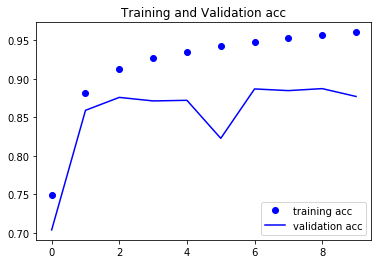

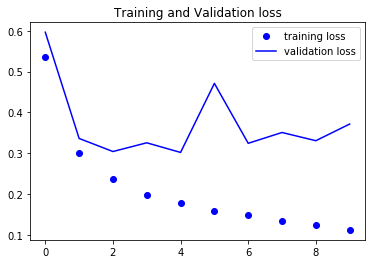

In [7]:
# LSTM sample

from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10, batch_size=128, validation_split=0.2)
from _compareTV import compare_TV
compare_TV(history)

